In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Inputs

In [2]:
#Tamaño de la matriz
matrix_size=30

#Longitud de línea 1
lenght_line1= 12

#Cantidad de puntos por línea
puntos1=(lenght_line1*100)//10
puntos2=(lenght_line1*100)//10
puntos3=100
puntos4=100

#Posición en Y de línea 1
qloc_y=5
#Posición en x de línea 2
qloc_x2=0
#Puntos mínimo y máximo en Y
y2i=-4
y2f=-7

#Parte de arriba del dipolo
y3i=0 #altura inicial 
y3f=1 #altura final
qloc_x3=0 #posición en x

#Parte de abajo del dipolo
y4i=0 #altura inicial
y4f=-1 #altura final
qloc_x4=0 #posición en x

#Tamaño carga 1
q= 2e-5
#Tamaño carga 2
q2=-2e-5
#Tamaño parte arriba dipolo
q3=-1e-5
#Tamaño parte abajo dipolo
q4=1e-5

#Tamaño de los puntos de la línea 1
s1=150
#Tamaño de los puntos de la línea 2
s2=150
#Tamaño de los puntos del dipolo 
s3=50
s4=s3

#Tamaño de los ejes
gminx=-((lenght_line1/2)+1) #mínimo en x
gmaxx=((lenght_line1/2)+1)  #máximo en x
gminy=y2f-1                 #mínimo en y
gmaxy=qloc_y+1              #máximo en y

#Constante de Coulomb
k= 9e9

## Función

In [3]:
def getfield (X, Y, q, qloc, k):
    
    X_new= X-qloc[0] #Cambian los valores en base a las coordenadas
    Y_new= Y-qloc[1] #Cambian los valores en base a las coordenadas

    comp = X_new + (Y_new * 1j) 
    angle=np.angle(comp) #Cálculo del ángulo

    r2=(X_new**2)+(Y_new**2) #Consiguiendo el valor de r^2
    En=(k*q)/(r2) #Valor del Campo Eléctrico

    Ex=En*(np.cos(angle)) #Componente X del Campo eléctrico
    Ey=En*(np.sin(angle)) #Componente Y del Campo eléctrico
    
    return Ex, Ey #Devuelve las componentes del campo

In [4]:
#Definen la cantidad de puntos "Cargas" y sus coordenadas en el eje X 
qlocx_range= np.linspace(-(lenght_line1/2),(lenght_line1/2),puntos1)
qlocy_range2= np.linspace(y2i,y2f,puntos2)
qlocy_range3= np.linspace(y3i,y3f,puntos3)
qlocy_range4= np.linspace(y4i,y4f,puntos4)


#Se encargan de asegurarse que las cargas negativas sean Negras y las positivas Rojas
if(q<0):
    c1="black"
if(q>=0):
    c1="red"
if(q2<0):
    c2="black"
if(q2>=0):
    c2="red"
if(q3<0):
    c3="black"
if(q3>=0):
    c3="red"
if(q4<0):
    c4="black"
if(q4>=0):
    c4="red"

### Punto 1

In [5]:
Ex=np.zeros([matrix_size,matrix_size]) #Crea una matriz de Ceros en Ex para poder reemplazar los valores luego
Ey=np.zeros([matrix_size,matrix_size]) #Crea una matriz de Ceros en Ey para poder reemplazar los valores luego

Ex2=np.zeros([matrix_size,matrix_size]) #Crea una matriz de Ceros en Ex2 para poder reemplazar los valores luego
Ey2=np.zeros([matrix_size,matrix_size]) #Crea una matriz de Ceros en Ey2 para poder reemplazar los valores luego

Ex3=np.zeros([matrix_size,matrix_size]) #Crea una matriz de Ceros en Ex para poder reemplazar los valores luego
Ey3=np.zeros([matrix_size,matrix_size]) #Crea una matriz de Ceros en Ey para poder reemplazar los valores luego

Ex4=np.zeros([matrix_size,matrix_size]) #Crea una matriz de Ceros en Ex2 para poder reemplazar los valores luego
Ey4=np.zeros([matrix_size,matrix_size]) #Crea una matriz de Ceros en Ey2 para poder reemplazar los valores luego

x=np.linspace(gminx,gmaxx,matrix_size) #Define los puntos que serán usados para la matriz
y=np.linspace(gminy,gmaxy,matrix_size) #Define los puntos que serán usados para la matriz
X,Y= np.meshgrid(x,y) #Crea la matriz X Y




In [6]:
for i,qloc_x in enumerate (qlocx_range): #Ciclo que se repite una vez por carga en la línea 1
    
    #llama a la función "getfield" y los valores que regresa "Ex y Ey" son reemplazados por New_Ex y New_Ey
    New_Ex, New_Ey = getfield(X, Y, q, [qloc_x,qloc_y],k) 
    
    
    Ex+=New_Ex #Va sumando los valores de Ex
    Ey+=New_Ey #Va sumando los valores de Ey
    
for i, qloc_y2 in enumerate (qlocy_range2): #Ciclo que se repite una vez por carga en la línea 2
    
    #llama a la función "getfield" y los valores que regresa "Ex y Ey" son reemplazados por New_Ex2 y New_Ey2
    New_Ex2, New_Ey2 = getfield(X, Y, q2, [qloc_x2,qloc_y2],k)
    
    Ex2+=New_Ex2 #Va sumando los valores de Ex2
    Ey2+=New_Ey2 #Va sumando los valores de Ey2

for i,qloc_y3 in enumerate (qlocy_range3): #Ciclo que se repite una vez por carga en la línea 1
    
    #llama a la función "getfield" y los valores que regresa "Ex y Ey" son reemplazados por New_Ex y New_Ey
    New_Ex3, New_Ey3 = getfield(X, Y, q3, [qloc_x3,qloc_y3],k) 
    
    
    Ex3+=New_Ex3 #Va sumando los valores de Ex
    Ey3+=New_Ey3 #Va sumando los valores de Ey
    
for i, qloc_y4 in enumerate (qlocy_range4): #Ciclo que se repite una vez por carga en la línea 2
    
    #llama a la función "getfield" y los valores que regresa "Ex y Ey" son reemplazados por New_Ex2 y New_Ey2
    New_Ex4, New_Ey4 = getfield(X, Y, q4, [qloc_x4,qloc_y4],k)
    
    Ex4+=New_Ex4 #Va sumando los valores de Ex2
    Ey4+=New_Ey4 #Va sumando los valores de Ey2

#Se hacen las sumatorias de los componentes en X y en Y para tener la sumatoria total
Ext=Ex+Ex2+Ex3+Ex4
Eyt=Ey+Ey2+Ey3+Ey4

sca

In [7]:
mag=np.sqrt((Ext**2)+(Eyt**2)) #Saca la magnitud de los vectores

Ex_u=Ext/mag #Saca el componente en X del vector unitario
Ey_u=Eyt/mag #Saca el componente en Y del vector unitario

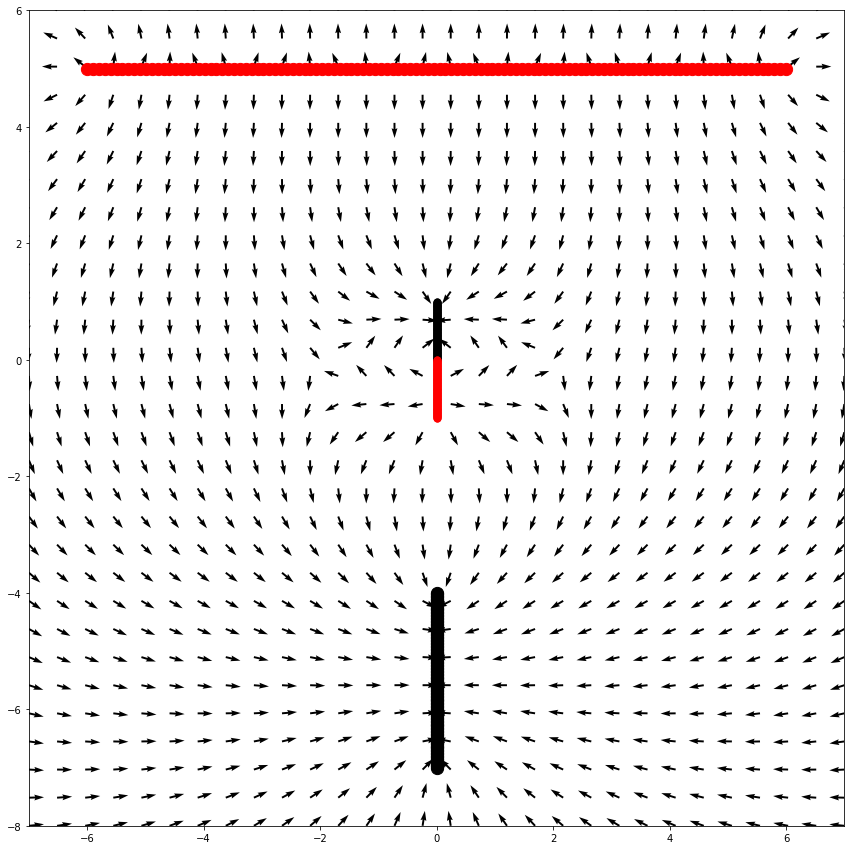

In [8]:
# Creamos una figura y eje con plt.subplots()
fig, ax = plt.subplots(figsize = (15,15))


# Agregamos al eje las flechas de los vectores con plt.quiver()
ax.quiver(X,Y,Ex_u,Ey_u,color="black")

#Usamos los ciclos para agregar la cantidad de puntos deseados
for i,qloc_x in enumerate (qlocx_range):
    
    ax.scatter(qloc_x,qloc_y,c=c1,s=s1)

for i, qloc_y2 in enumerate(qlocy_range2):
        ax.scatter(qloc_x2,qloc_y2,c=c2, s=s2)

for i,qloc_y3 in enumerate (qlocy_range3):
    
    ax.scatter(qloc_x3,qloc_y3,c=c3,s=s3)

for i, qloc_y4 in enumerate(qlocy_range4):
        ax.scatter(qloc_x4,qloc_y4,c=c4, s=s4)


#Configuramos las dimensiones del eje y el aspecto
ax.axis([gminx,gmaxx,gminy,gmaxy])
ax.set_aspect('equal','box')